In [17]:
import cv2
import imutils
# import argparse
import numpy as np
from imutils import contours
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import re
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [18]:
def show_gray(img):
    figure(figsize=(10, 6))
    plt.imshow(img, cmap='gray')
def show_img(img):
    figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    

In [19]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (60, 2))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

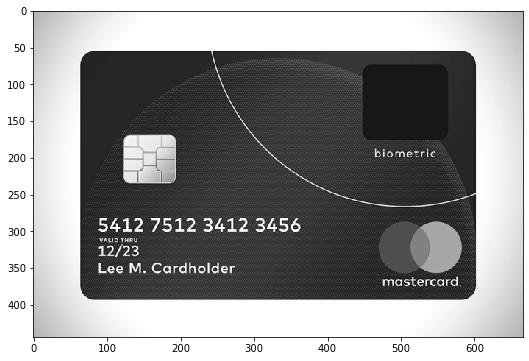

In [20]:
image = cv2.imread('mastercard.jpg')
image = imutils.resize(image, width=666)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_gray(gray)

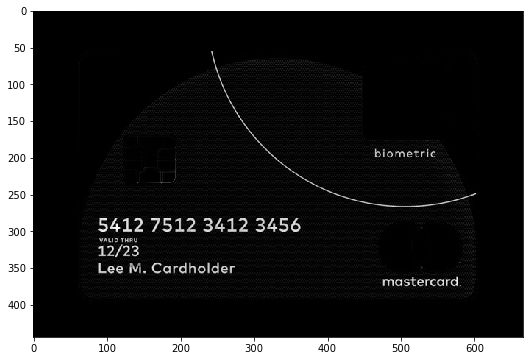

In [21]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT,sqKernel)
show_gray(tophat)

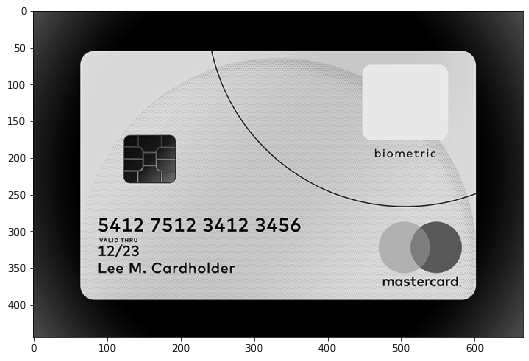

In [22]:
gray_invert = cv2.bitwise_not(gray)
show_gray(gray_invert)

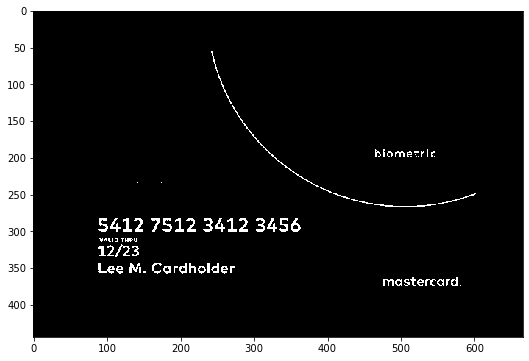

In [23]:
thresh = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
show_gray(thresh)

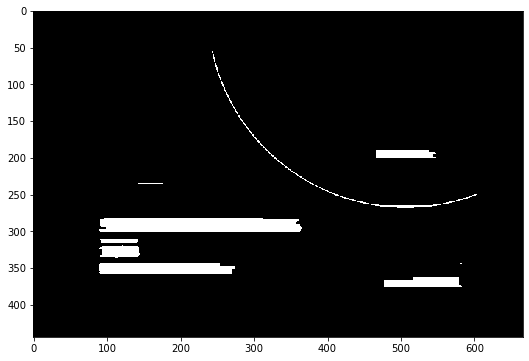

In [24]:
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rectKernel)
show_gray(closing)

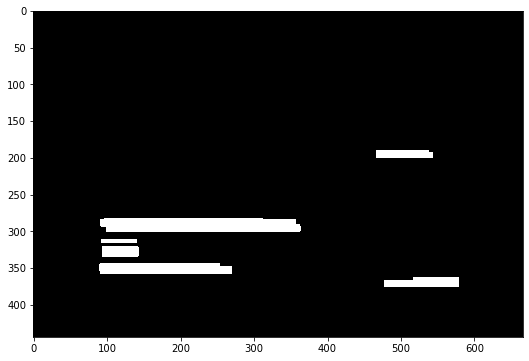

In [25]:
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, sqKernel)
show_gray(opening)

In [26]:
cnts = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []

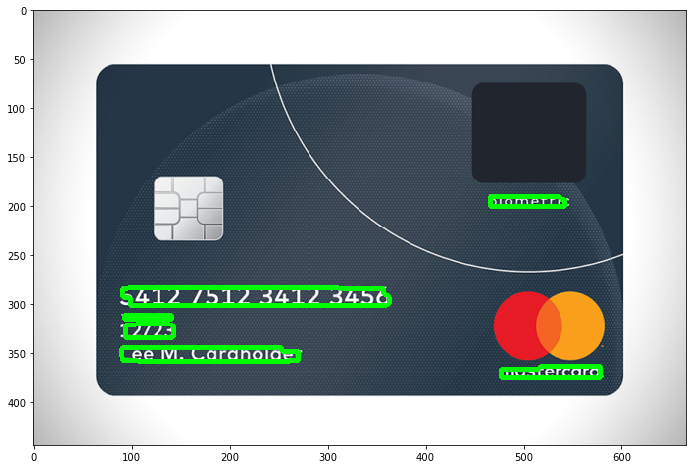

In [27]:
result = cv2.drawContours(image.copy(), cnts, -1, (0,255,0), 3)
show_img(result)

['', '', '', '', 'biometric']
['', '', '', '', '5412', '7512', '3412', '3456']
['', '', '', '', '12/23']
['', '', '', '', 'Lee', 'M.', 'Cardholder']
['', '', '', '', 'mastercard.']


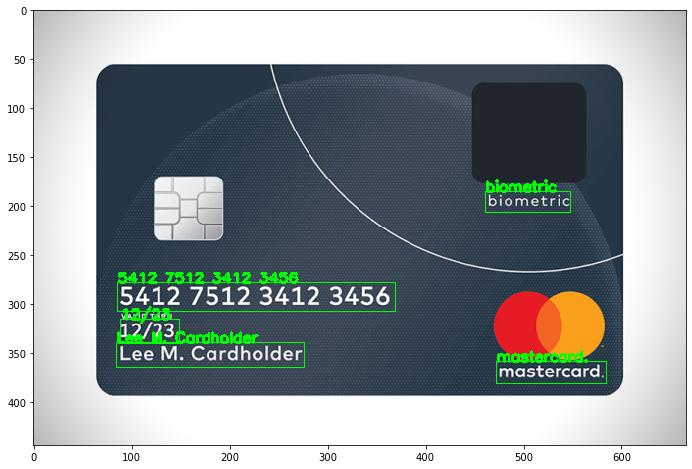

In [28]:
result = image.copy()

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)    
    ar = w / float(h)
    if ar > 2.5 and h > 8 :            
        locs.append((x, y, w, h))
        cv2.rectangle(result, (x - 5, y - 5), (x + w + 5, y + h + 5), (0, 255, 0,), 1)
locs = sorted(locs, key=lambda x:x[1])


for (x,y,w,h) in locs:
    ROI = gray_invert[y-5:y+h+5, x-5:x+w+5]
    d = pytesseract.image_to_data(ROI, output_type=Output.DICT)
    print(d['text'])
    cv2.putText(result, ' '.join(d['text'][4:]), (x-5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
show_img(result)